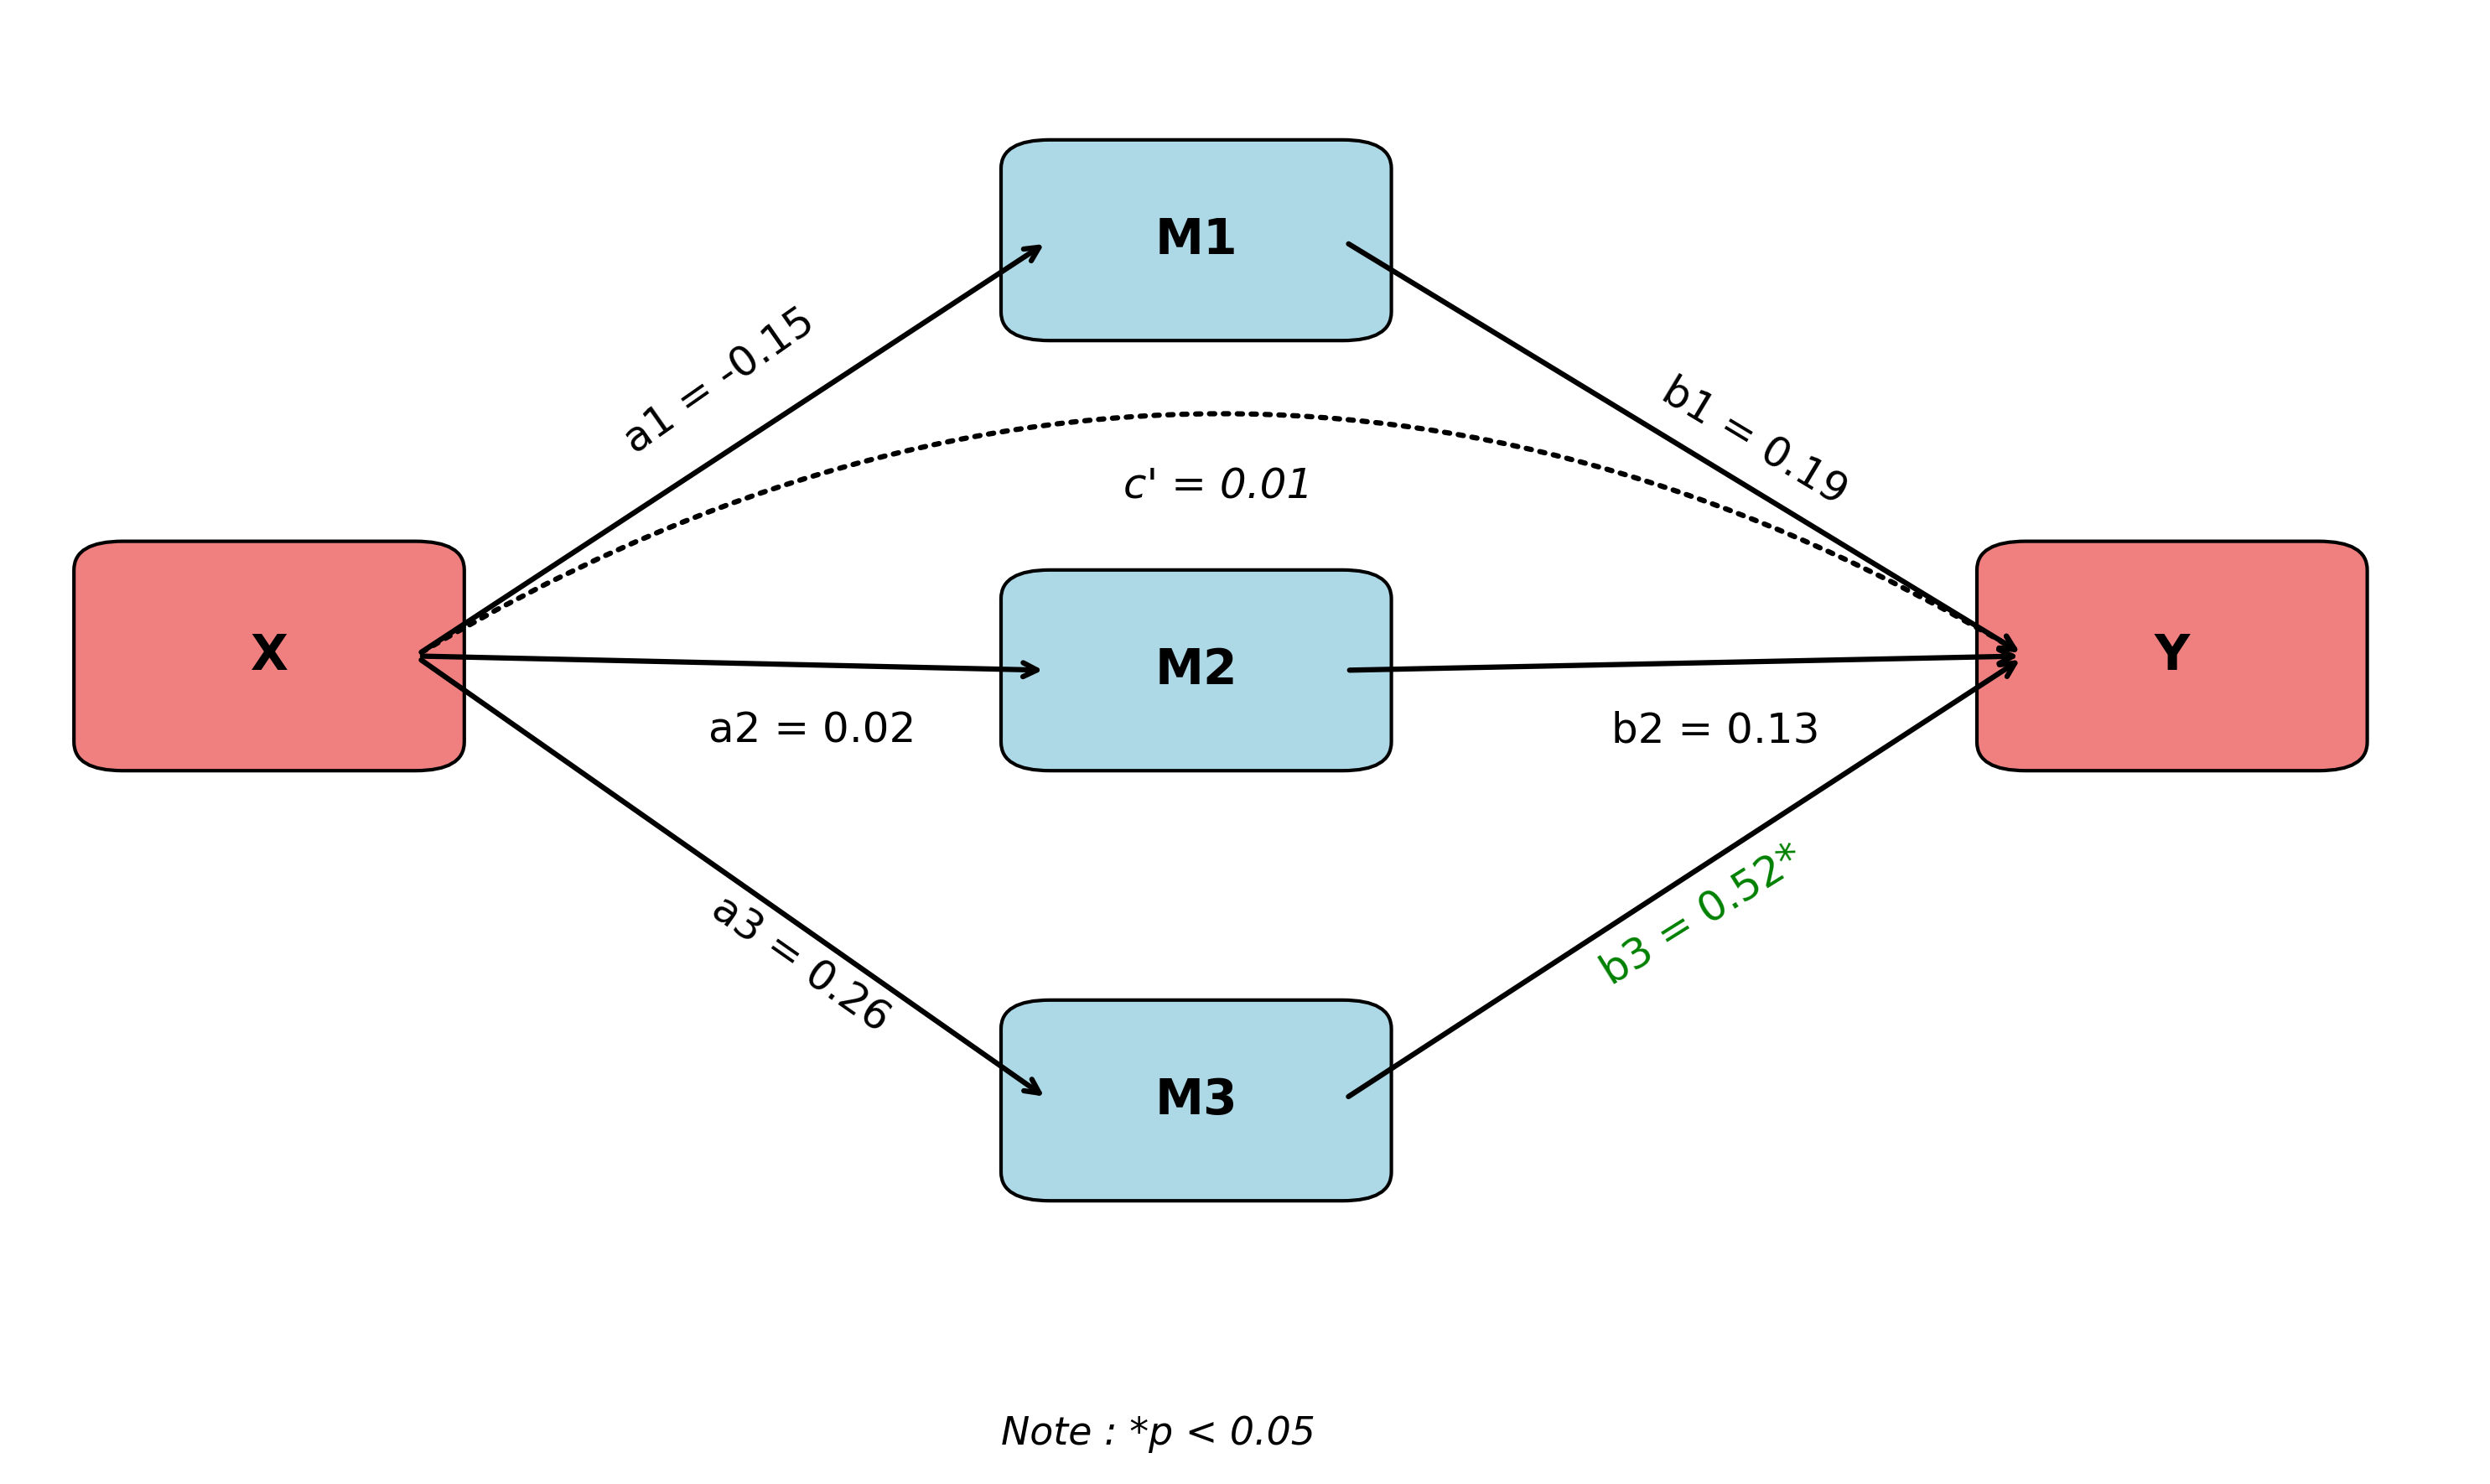

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Positions des boîtes
positions = {
    "X": (0.04, 0.5),
    "M1": (0.42, 0.8),
    "M2": (0.42, 0.5),
    "M3": (0.42, 0.2),
    "Y": (0.82, 0.5)
}

# Define different dimensions (width, height)
size_xy = (0.12, 0.12)  # Example: Wider and slightly taller for X and Y
size_m = (0.12, 0.1)   # Original size for M boxes

def plot_mediation_with_rotated_labels():
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Adjusted DPI and figure size
    ax.axis('off')

    # Boîtes (Boxes) - Now with conditional sizing
    for label, (x, y) in positions.items():
        if label in ["X", "Y"]:
            box_width, box_height = size_xy
            face_color = 'lightcoral' # Optional: Different color for X and Y
        else: # For M1, M2, M3
            box_width, box_height = size_m
            face_color = 'lightblue' # Original color for M boxes

        # Add the patch with the determined dimensions and color
        ax.add_patch(patches.FancyBboxPatch((x, y), box_width, box_height,
                                             boxstyle="round,pad=0.02",
                                             edgecolor='black', facecolor=face_color)) # Use determined face_color
        
        # Adjust text position dynamically based on box size to keep it centered
        ax.text(x + box_width / 2, y + box_height / 2, label, 
                ha='center', va='center', fontsize=14, weight='bold') # Increased font size

    # --- The rest of your code for arrows and labels remains the same ---

    # Flèches X → M (Arrows X -> M) - Adjust start point based on X's width
    x_start_arrow = positions["X"][0] + size_xy[0] # Use X's width
    y_start_arrow = positions["X"][1] + size_xy[1] / 2 # Center vertically on X
    for m in ["M1", "M2", "M3"]:
        m_end_arrow_x = positions[m][0] # Left edge of M box
        m_end_arrow_y = positions[m][1] + size_m[1] / 2 # Center vertically on M box
        ax.annotate("",
                    xy=(m_end_arrow_x, m_end_arrow_y), 
                    xytext=(x_start_arrow, y_start_arrow),
                    arrowprops=dict(arrowstyle="->", color='black', lw=1.5))

    # Flèches M → Y (Arrows M -> Y) - Adjust end point based on Y's width/height
    y_end_arrow_x = positions["Y"][0] # Left edge of Y box
    y_end_arrow_y = positions["Y"][1] + size_xy[1] / 2 # Center vertically on Y box
    for m in ["M1", "M2", "M3"]:
        m_start_arrow_x = positions[m][0] + size_m[0] # Right edge of M box
        m_start_arrow_y = positions[m][1] + size_m[1] / 2 # Center vertically on M box
        ax.annotate("",
                    xy=(y_end_arrow_x, y_end_arrow_y),
                    xytext=(m_start_arrow_x, m_start_arrow_y),
                    arrowprops=dict(arrowstyle="->", color='black', lw=1.5))

    # Flèche directe X → Y (pointillée) (Direct arrow X -> Y dotted)
    # Adjust start/end points slightly if needed due to different box sizes
    # Option 1: Keep original y-offset approach
    # ax.annotate("",
    #             xy=(positions["Y"][0], positions["Y"][1] + 0.1), # Adjust offset if needed
    #             xytext=(positions["X"][0] + size_xy[0], positions["X"][1] + 0.1), # Adjust offset if needed
    #             arrowprops=dict(arrowstyle="->", linestyle="dotted", color="black", lw=1.5))
    # Option 2: Arrow between centers (might overlap M2)
    ax.annotate("",
                xy=(positions["Y"][0], y_end_arrow_y), # Center of Y (left edge, vertical center)
                xytext=(x_start_arrow, y_start_arrow), # Center of X (right edge, vertical center)
                arrowprops=dict(arrowstyle="->", linestyle="dotted", color="black", lw=1.5,
                                connectionstyle="arc3,rad=-0.3")) # Added connectionstyle to curve it slightly

    # Étiquettes inclinées alignées avec les flèches (Slanted labels aligned with arrows)
    ax.text(0.25, 0.70, "a1 = -0.15", fontsize=12, rotation=35, rotation_mode='anchor')  # Adjusted position/angle slightly
    ax.text(0.28, 0.38, "a3 = 0.26", fontsize=12, rotation=-35, rotation_mode='anchor') # Adjusted position/angle slightly
    ax.text(0.67, 0.74, "b1 = 0.19", fontsize=12, rotation=-31, rotation_mode='anchor') # Adjusted position/angle slightly
    ax.text(0.65, 0.33, "b3 = 0.52*", fontsize=12, rotation=32, rotation_mode='anchor', color='green') # Adjusted position/angle slightly

    # Étiquettes non-inclinées (Non-slanted labels)
    ax.text(0.28, 0.50, "a2 = 0.02", fontsize=12)  # Adjusted position slightly
    ax.text(0.65, 0.50, "b2 = 0.13", fontsize=12)  # Adjusted position slightly
    # Adjust c' position to be above the dotted line
    ax.text(0.45, 0.67, "c' = 0.01", fontsize=12, style='italic') # Adjusted position slightly
    ax.text(0.4, 0.01, "Note : *p < 0.05", fontsize=11, style='italic') # Adjusted font size

    plt.tight_layout()
    plt.show()

# Lancer la fonction (Run the function)
plot_mediation_with_rotated_labels()